# Tests on the Generated grid

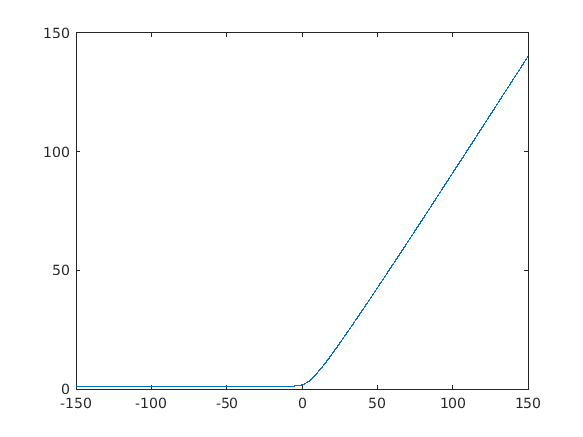

In [17]:
addpath("~/phd_work/projects/aretakis_extremal_hair/codes/conversion")

x = linspace(-150,150,3000);
m = 1;
r_ern = RstarToRwithCharge_Newton(x,m); %--> extremal-RN converion routine
plot(x,r_ern)

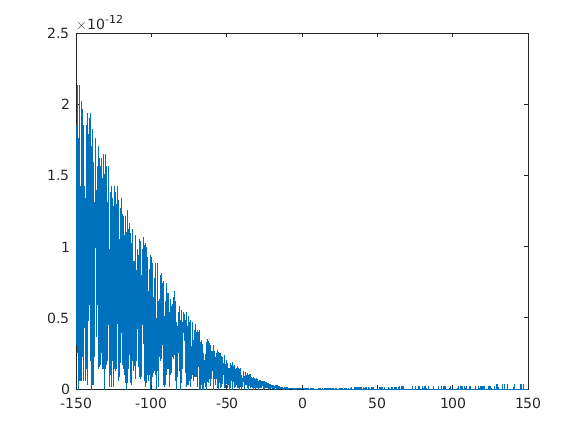

In [18]:
% analytic test to check correctness of conversion routine
%m = 1;
%r = linspace(1.001,200,20100);
rs = r_ern + 2*m*log(r_ern/m - 1) - m^2./(r_ern-m); %--> rstar as a fn of r
plot(x,abs(rs-x))

# Tests for conversion routine and potential on actual grid 

In [ ]:
N=9; xL = -1200; xR = 4000; K = 500;
StartUp1D;

xmin = min(abs(x(1,:)-x(2,:)))
dg_globals.xmin=xmin;
locR=-150;


[idx1,idx2]=find_value_arr(x,locR);
%[idx1,idx2]=find(abs(x-locR)<1);
idx1=idx1(1); idx2=idx2(1);
locR=x(idx1,idx2);
s=xL;
P=4;


omega = 1  - ( ( (x-locR)./(s-locR) ).^P).*homeHVSD(locR-x);

omegaP = (-1).*(((-1).*locR+s).^(-1).*((-1).*locR+x)).^P.*0 ...
                +(-1).*P.*((-1).*locR+s)^(-1).*(((-1).*locR+s).^(-1) ...
                *((-1).*locR+x)).^((-1)+P).*homeHVSD((+1).*locR-x);
                
ohm = omega.^2./(omega - x.*omegaP);

capH   = 1-ohm;

rstar_adj = x./(omega); % need to prevent Inf at x(end,end)

%%%%%%%%%%%%%%%%%% Set conversion routines and potentials 

r_ern=RstarToRwithCharge_Newton(rstar_adj,M); % -- changed on 12/22/23
%r_ern_som=RstarToRwithCharge_Newton(rstar_adj,M);
%r_ern(Np,K)=r_ern_som(Np,K);

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%pot_sch=(1-2*M./r_sch).*(-2*M./(r_sch.^3) - ell*(ell+1)./r_sch.^2);
pot_ern=-(ell*(ell + 1)./r_ern.^4 + (2*M - 2*M^2./r_ern)./r_ern.^5).*...
     (r_ern.^2 -2*M.*r_ern + M^2); %-- checked on 12/22/23


Potential_eff = (1./((1-capH).*(1+capH))).*pot_ern;
Potential_eff(1,1)=double(0);
% different way of writting the potential, good for large r evaluations

% Pot_inf=((omega-x_64.*omegaP)./(1+capH))...
%         .*((x-2*M*omega)./x)...
%         .*((-2*M*omega)./x.^3 - ell.*(ell+1)./x.^2);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%{ 
 Pot_inf = ((omega-x_64.*omegaP)./(1+capH))...
     .*((x.^2-2*M*omega.*x + M^2.*omega.^2)./x.^2)...
     .*(-(2*M - 2*M^2.*omega./x).*omega./x.^3 - ell.*(ell+1)./x.^2);

Potential_eff(Np,K)=double(Pot_inf(Np,K));
%}
% Potential_eff=-(omega-x.*omegaP).*(ell*(ell+1))./(x.*x.*(1+capH));
%Potential(end,end) = 0;
%Potential(end,end) = - Pot_large_r(end,end);
Potential=Potential_eff;
phys_system.Potential=Potential;

# Tests on the potential routine

In [ ]:
%rstar_ern = linspace(-100,1200,1300*5);
rstar_ern = -100;
M=0.5;
Q=M;
r_ern = RstarToR_ERN(rstar_ern,M);
Delta = (r_ern - M).^2 ;
pot = (2*M - 2*Q^2./r_ern).*(Delta./r_ern.^5);
pot(1)
%plot(r_rn, pot, 'LineWidth',1)

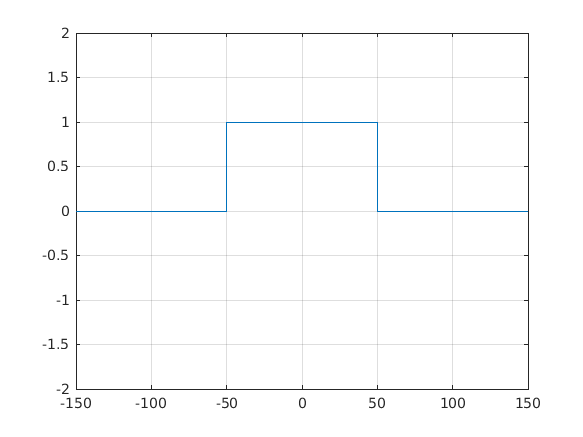

In [6]:
addpath('phd_work/projects/aretakis_extremal_hair/codes/custom_codes')
R2=-50;
R1=50;
x = linspace(-150,150,3000);
compact= 1-(homeHVSD(R2 - x) + homeHVSD(x - R1)); %--> This would get me a compactified initial pulse.
plot(x,compact)
ylim([-2,2])
grid()